<div class="alert alert-block alert-warning">
    <h1><center> App 08 - Human Activity Recognition Using Accelerometer and Gyroscope Sensors  </center></h1>

### Group Members:

### Rimsha Kaokab - 2411328
### Ayesha Zafar - 2409916


## Problem Statement:
The goal of this project is to build a machine learning model that can classify six human activities—lying, sitting, standing, walking, walking upstairs, walking downstairs—using data collected from smartphone sensors. The dataset contains recordings of 3-axial accelerometer and gyroscope data from 30 individuals, with a sampling frequency of 50Hz.

This project addresses an important application of HAR (Human Activity Recognition) in fields like healthcare, elderly monitoring, and rehabilitation systems.

## Dataset Overview:
Device: Samsung Galaxy S II smartphone worn at the waist.

Sensors: 3-axis accelerometer and gyroscope.

Sampling Rate: 50 Hz.

Subjects: 30 individuals (20 used for training, 10 for testing).

Format: Each CSV file contains 5 seconds of sensor data with 6 columns: acc_x, acc_y, acc_z, gyr_x, gyr_y, gyr_z.

Each file corresponds to a single labeled activity.

## Data Exploration:
1. Class Balance:
Training set is reasonably balanced, with slightly fewer samples for walking activities compared to static ones. And the test set has same distribution trend. The count plots showed minor class imbalance but sufficient representation across all activities.

2. Feature Distribution:
The mean values of each sensor signal (acc_x, acc_y, acc_z, gyr_x, gyr_y, gyr_z) were visualized. A clear separation was observed for some activities on features like acc_x mean, suggesting these features could help in classification.

## Feature Extraction:
To capture the unique movement patterns of each activity class, we extracted a comprehensive set of features from each 5-second segment of accelerometer and gyroscope data. This included both manually engineered and automatically extracted features.

Two sets of features were extracted for each signal:

1. Manually Engineered Features
  * Time-Domain Features:
  
    Basic statistics: Mean, Standard Deviation, Min, Max, Median, Range (Peak-to-Peak)

    Shape descriptors: Skewness, Kurtosis

    Energy: Sum of squares (signal intensity)

    SMA (Signal Magnitude Area): Measures total body acceleration

    Resultant Acceleration: Vector magnitude of combined axes

    Axis Correlation Coefficients: Captures inter-axis coordination (e.g., acc_x vs acc_y)

  * Frequency-Domain Features (via FFT):
    
    Spectral Energy

    Spectral Entropy

    Peak Frequency

These frequency features help characterize rhythmic motion patterns, such as walking or climbing stairs.

2. Automated Features (via TSFEL)

We used the TSFEL (Time Series Feature Extraction Library) to compute over 100 additional features spanning:

* Wavelet Features: Energy, standard deviation, and absolute mean across frequency bands (e.g., 1.39Hz, 1.56Hz, 2.08Hz, 3.12Hz)

* Spectral Features: Spectral distance, spectral decrease, and fundamental frequency

* ECDF Percentiles: Captures distribution spread

* Temporal Characteristics: Hjorth parameters, zero-crossing rates, etc.

These domain-specific features add significant value by capturing temporal variation, signal smoothness, and complexity beyond traditional statistics.

The final Dataset is a combination of basic statistical features and tsfel features for each sample.

## Feature Standardization
StandardScaler from sklearn.preprocessing was applied to ensure consistency across feature scales. The mean and standard deviation were computed from the training set only. These parameters were then used to transform both the training and test sets to avoid data leakage. Standardization was essential for models like SVM that are sensitive to the scale of input features.

## Model Training and Validation:
We trained and evaluated two supervised machine learning models using scikit-learn, to classify human activities based on sensor-derived feature.

1. Random Forest Classifier:

  *   A non-parametric ensemble model that combines multiple decision trees.
  *   Benefits from built-in feature importance estimation.
  *   Resistant to overfitting and handles high-dimensional data well.

2. Support Vector Machine:
 * A powerful non-linear classifier that constructs optimal decision boundaries in a transformed feature space.

  * The Radial Basis Function (RBF) kernel enables modeling complex activity patterns.

  * Suitable for smaller to mid-sized datasets with standardized features.

## Cross-Validation:
Both models were validated using Stratified 5-Fold Cross-Validation to ensure robust performance and avoid overfitting. This ensures each fold preserves the percentage of samples for each activity class.

| Model            | Cross-Validation Mean Accuracy | Standard Deviation |
|------------------|---------------------------------|--------------------|
| Random Forest    | 97.43%                          | ±0.71%             |
| SVM (RBF Kernel) | 97.80%                          | ±0.76%             |

SVM slightly outperformed Random Forest during cross-validation.

## Feature Importance Analysis:

Using the .feature_importances_ attribute of the trained Random Forest model, we identified the most influential features contributing to activity classification:

#### Top Features	Description
1. acc_x_Spectral distance	Measures the frequency spread of acc_x signal
2. gyr_x_Mean	Captures rotation patterns around X-axis
3. acc_x_Wavelet energy_1.39Hz	Represents low-frequency dynamic movement
4. gyr_x_Spectral decrease	Indicates frequency decay in gyroscope signal
5. acc_x_Wavelet std dev	Highlights signal variability in frequency band
6. ECDF Percentiles	Reflect statistical distribution of sensor values

## Test Set Evaluation

Model	Test Accuracy

**Random Forest:**	95.14%

**SVM:**	96.62%

1. Classification Report:

  * Random Forest: Highest precision for lying, walking downstairs, and walking upstairs. There were some minor misclassifications between standing and sitting.

  * SVM: Higher overall precision and recall across almost all activities. It is especially good at distinguishing walking upstairs and walking downstairs, where many models usually struggle.

2. Confusion Matrices

Confusion matrices showed that:

  * Lying, Sitting, and Walking were generally very well classified.

  * Minor confusion between walking downstairs vs walking for both models.


## Key Observations
  * SVM achieved the best overall performance on the test set.

  * Feature engineering, especially using frequency-domain information and automatic feature extraction (tsfel), significantly improved performance.

  * Activities like lying and standing were easiest to classify.

  * Walking upstairs and walking downstairs were more challenging but handled well by both models.

## Conclusion:
* Human activities can be effectively classified from smartphone sensor data using machine learning.

* Feature engineering is critical, combining time and frequency-domain features boosted model performance.

* Both Random Forest and SVM are highly capable for HAR tasks, but SVM slightly outperformed Random Forest in this case.

## Future Work:

* Sequence models like LSTM (Long Short-Term Memory Networks) that can learn temporal patterns directly can be explored.

* An investigation into deeper feature selection can reduce model complexity.


#### Import libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install tsfel

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.6 MB/s eta 0:00:00


In [4]:
!pip install tsfresh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 17.4 MB/s eta 0:00:00


In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.fft import fft
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
# Libraries for advanced feature extraction
import tsfel
from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import impute

#### Load and Explore the Data

In [6]:
def load_data(root_dir):
    data = []
    labels = []
    for label in os.listdir(root_dir):
        class_dir = os.path.join(root_dir, label)
        if os.path.isdir(class_dir):
            for file in os.listdir(class_dir):
                df = pd.read_csv(os.path.join(class_dir, file), header=0)
                df.columns = ['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z']
                df = df.apply(pd.to_numeric, errors='coerce')  # Ensure all values are numeric
                df['label'] = label
                df['file'] = file
                data.append(df)
    return data

train_data = load_data("/content/drive/MyDrive/Data/Train")
test_data = load_data("/content/drive/MyDrive/Data/Test")

#### Check for class imbalance

In [7]:
# Extract labels
train_labels = [segment['label'].iloc[0] for segment in train_data]
test_labels = [segment['label'].iloc[0] for segment in test_data]

# Check distribution
train_label_counts = pd.Series(train_labels).value_counts()
test_label_counts = pd.Series(test_labels).value_counts()

print("Train Class Distribution:")
print(train_label_counts)
print("\nTest Class Distribution:")
print(test_label_counts)

Train Class Distribution:
standing              306
lying                 300
walking               279
sitting               277
walking_upstairs      243
walking_downstairs    230
Name: count, dtype: int64

Test Class Distribution:
lying                 192
standing              188
sitting               177
walking               144
walking_upstairs      128
walking_downstairs    119
Name: count, dtype: int64


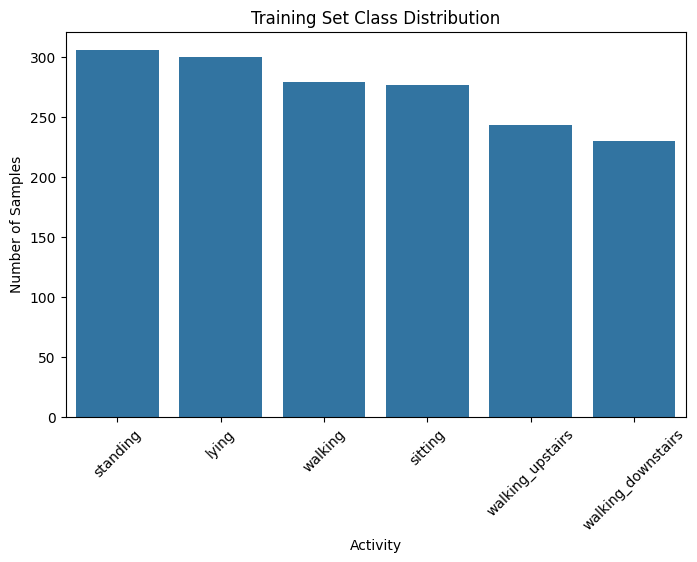

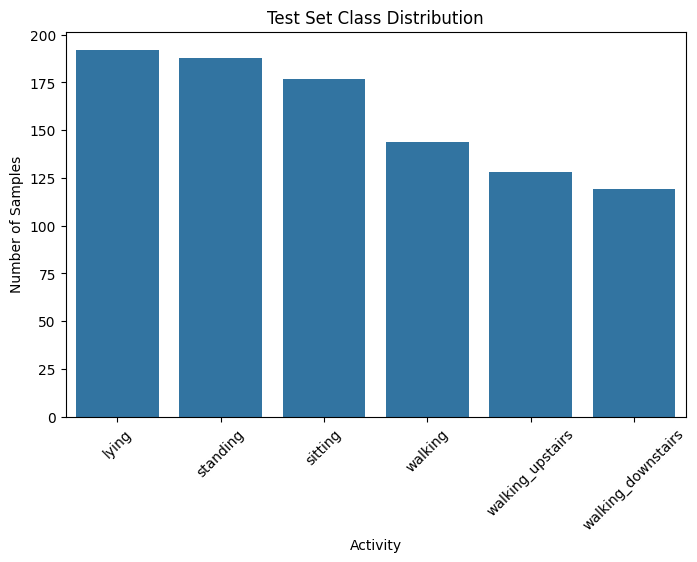

In [8]:
# Plot train distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=train_labels, order=train_label_counts.index)
plt.title('Training Set Class Distribution')
plt.xticks(rotation=45)
plt.xlabel('Activity')
plt.ylabel('Number of Samples')
plt.show()

# Plot test distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=test_labels, order=test_label_counts.index)
plt.title('Test Set Class Distribution')
plt.xticks(rotation=45)
plt.xlabel('Activity')
plt.ylabel('Number of Samples')
plt.show()

#### Feature Distribution

In [9]:
# List of sensor columns
sensor_columns = ['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z']

# Text output
for col in sensor_columns:
    feature_means = []
    labels = []

    for segment in train_data:
        feature_mean = np.mean(segment[col])
        feature_means.append(feature_mean)
        labels.append(segment['label'].iloc[0])

    # Create a DataFrame
    df = pd.DataFrame({'Activity': labels, f'{col}_mean': feature_means})

    # Get the mean value per activity
    summary = df.groupby('Activity').mean()

    print(f"\n==== {col.upper()} Mean Values Across Activities ====")
    for activity in summary.index:
        value = summary.loc[activity].values[0]
        print(f"{activity}: {value:.4f}")


==== ACC_X Mean Values Across Activities ====
lying: 0.0855
sitting: 0.9587
standing: 1.0001
walking: 0.9943
walking_downstairs: 0.9921
walking_upstairs: 0.9488

==== ACC_Y Mean Values Across Activities ====
lying: 0.6459
sitting: 0.1154
standing: -0.1673
walking: -0.1879
walking_downstairs: -0.1600
walking_upstairs: -0.2745

==== ACC_Z Mean Values Across Activities ====
lying: 0.4837
sitting: 0.1256
standing: -0.0172
walking: -0.0732
walking_downstairs: -0.0664
walking_upstairs: -0.1491

==== GYR_X Mean Values Across Activities ====
lying: 0.0060
sitting: 0.0066
standing: 0.0055
walking: 0.0011
walking_downstairs: -0.3073
walking_upstairs: 0.2991

==== GYR_Y Mean Values Across Activities ====
lying: 0.0014
sitting: 0.0018
standing: 0.0001
walking: 0.0004
walking_downstairs: 0.0661
walking_upstairs: -0.0903

==== GYR_Z Mean Values Across Activities ====
lying: 0.0003
sitting: -0.0010
standing: 0.0019
walking: -0.0013
walking_downstairs: 0.0060
walking_upstairs: -0.0511


#### Feature Extraction

In [10]:
def extract_signal_features(signal):
    fft_vals = np.abs(fft(signal))
    energy = np.sum(fft_vals**2)
    entropy = -np.sum((fft_vals / np.sum(fft_vals)) * np.log2(fft_vals / np.sum(fft_vals) + 1e-12))
    peak_freq = np.argmax(fft_vals)
    return [energy, entropy, peak_freq]

def extract_features_from_segment(segment):
    features = []
    for col in ['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z']:
        values = segment[col].values
        features.extend([
            np.mean(values),
            np.std(values),
            np.min(values),
            np.max(values),
            np.median(values),
            np.ptp(values),
            stats.skew(values),
            stats.kurtosis(values),
            np.sum(np.square(values)) / len(values)
        ])
        features.extend(extract_signal_features(values))

    # Signal Magnitude Area (SMA)
    sma = np.sum(np.abs(segment[['acc_x', 'acc_y', 'acc_z']].values)) / len(segment)
    features.append(sma)

    # Resultant Acceleration
    resultant = np.sqrt(np.sum(segment[['acc_x', 'acc_y', 'acc_z']].values**2, axis=1)).mean()
    features.append(resultant)

    # Axis correlations
    features.append(np.corrcoef(segment['acc_x'], segment['acc_y'])[0, 1])
    features.append(np.corrcoef(segment['acc_y'], segment['acc_z'])[0, 1])
    features.append(np.corrcoef(segment['acc_x'], segment['acc_z'])[0, 1])

    return features

def prepare_feature_set(data):
    feature_list = []
    label_list = []
    for segment in data:
        feature_list.append(extract_features_from_segment(segment))
        label_list.append(segment['label'].iloc[0])
    return pd.DataFrame(feature_list), label_list

X_train_basic, y_train = prepare_feature_set(train_data)
X_test_basic, y_test = prepare_feature_set(test_data)


In [11]:
def extract_tsfel_features(data):
    all_segments = []
    for segment in data:
        segment = segment.drop(columns=['label', 'file'])
        segment.reset_index(drop=True, inplace=True)
        all_segments.append(segment)

    # Load the correct feature configuration
    cfg = tsfel.get_features_by_domain()

    # Ensure the configuration is not incorrectly set as an integer
    if isinstance(cfg, int):
        raise ValueError("Configuration `cfg` is not valid, check the feature domain setup")
    fs = 50
    # Feature extraction
    features = [tsfel.time_series_features_extractor(cfg, s, fs=fs, verbose=False) for s in all_segments]

    # Concatenate the features
    return pd.concat(features, ignore_index=True)

X_train_tsfel = extract_tsfel_features(train_data)
X_test_tsfel = extract_tsfel_features(test_data)

# Merge basic + tsfel features
X_train = pd.concat([X_train_basic.reset_index(drop=True), X_train_tsfel.reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test_basic.reset_index(drop=True), X_test_tsfel.reset_index(drop=True)], axis=1)

#### Standardize the Data

In [12]:
# Convert column names to strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Now you can apply standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Train Classifiers

In [13]:
def cross_validate_model(model, X, y, model_name, cv_folds=5):
    skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    print(f"\n{model_name} Cross-Validation Accuracy Scores: {scores}")
    print(f"{model_name} Mean CV Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")


Cross-Validating Random Forest:

Random Forest Cross-Validation Accuracy Scores: [0.97247706 0.98470948 0.97859327 0.97247706 0.96330275]
Random Forest Mean CV Accuracy: 0.9743 (+/- 0.0071)

Cross-Validating SVM:

SVM Cross-Validation Accuracy Scores: [0.96941896 0.97553517 0.99082569 0.97247706 0.98165138]
SVM Mean CV Accuracy: 0.9780 (+/- 0.0076)


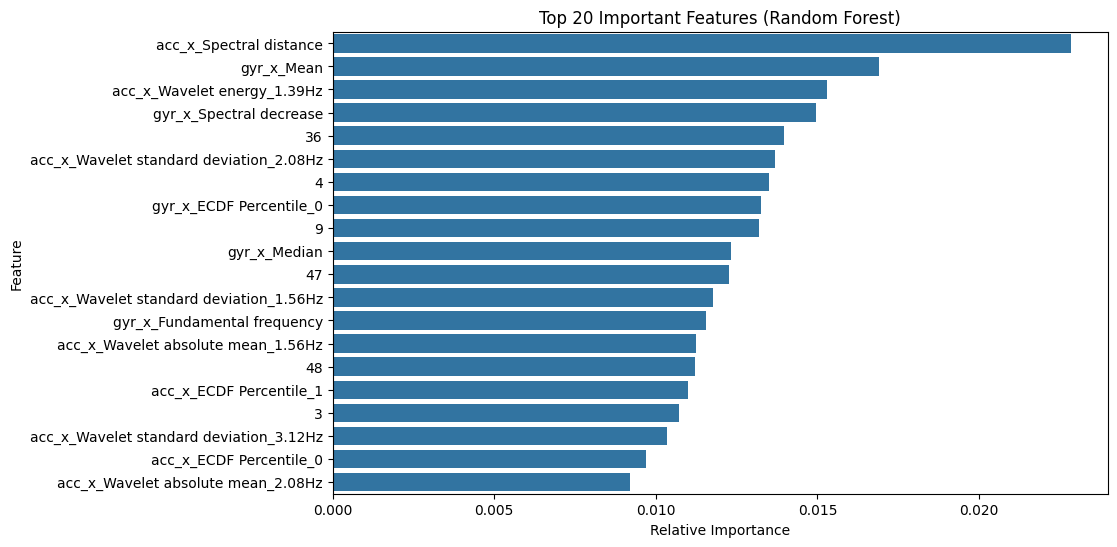

In [14]:
# Cross-Validation
print("\nCross-Validating Random Forest:")
cross_validate_model(RandomForestClassifier(random_state=42), X_train_scaled, y_train, "Random Forest")

print("\nCross-Validating SVM:")
cross_validate_model(SVC(kernel='rbf', probability=True), X_train_scaled, y_train, "SVM")

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Train SVM
svm_model = SVC(kernel='rbf', probability=True)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Feature Importance after predictions
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Top 20 important features
top_n = 20
top_features = [X_train.columns[i] for i in indices[:top_n]]

plt.figure(figsize=(10, 6))
plt.title("Top 20 Important Features (Random Forest)")
sns.barplot(x=importances[indices[:top_n]], y=[X_train.columns[i] for i in indices[:top_n]])
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()

#### Evaluation

In [15]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"\nEvaluation for {model_name}:")
    print(classification_report(y_true, y_pred))
    print("Accuracy:", accuracy_score(y_true, y_pred))

evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_svm, "SVM")


Evaluation for Random Forest:
                    precision    recall  f1-score   support

             lying       1.00      1.00      1.00       192
           sitting       0.87      0.94      0.90       177
          standing       0.94      0.86      0.90       188
           walking       0.94      0.99      0.97       144
walking_downstairs       1.00      0.94      0.97       119
  walking_upstairs       0.99      0.98      0.99       128

          accuracy                           0.95       948
         macro avg       0.96      0.95      0.95       948
      weighted avg       0.95      0.95      0.95       948

Accuracy: 0.9514767932489452

Evaluation for SVM:
                    precision    recall  f1-score   support

             lying       1.00      0.97      0.98       192
           sitting       0.96      0.97      0.96       177
          standing       0.97      0.96      0.97       188
           walking       0.99      0.93      0.96       144
walking_downsta

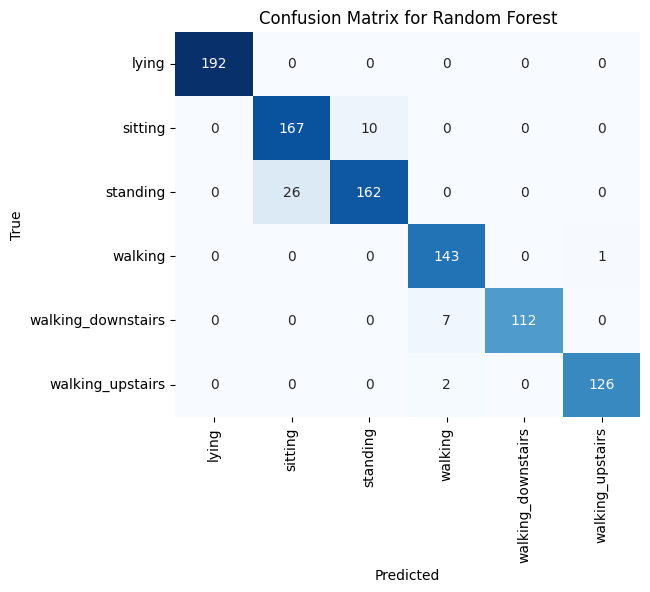

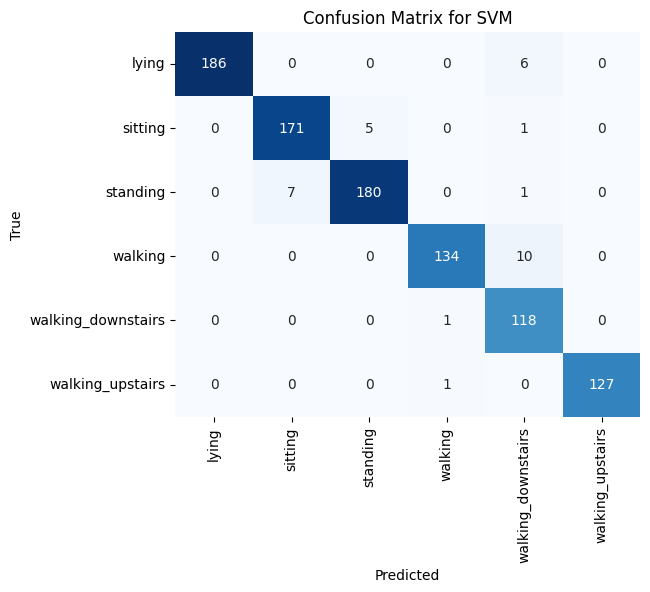

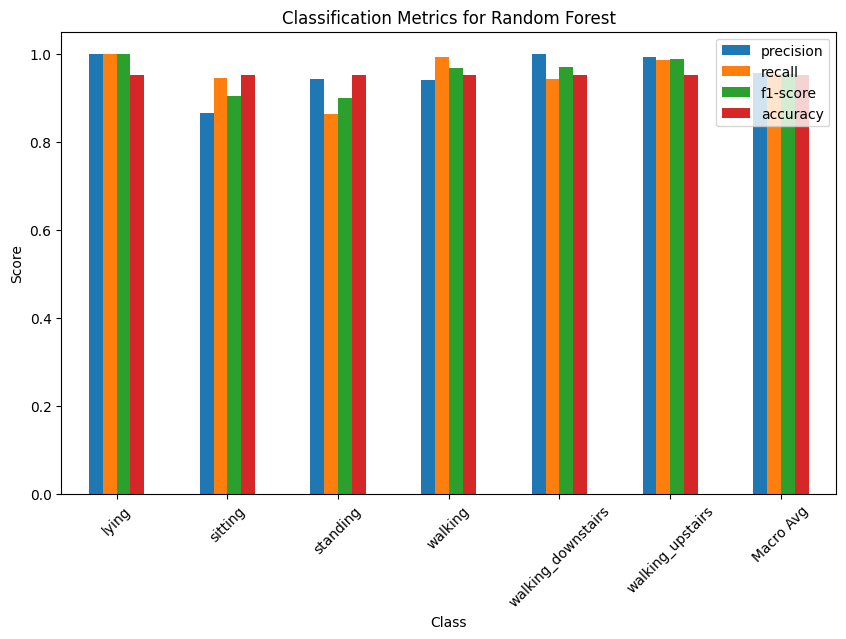

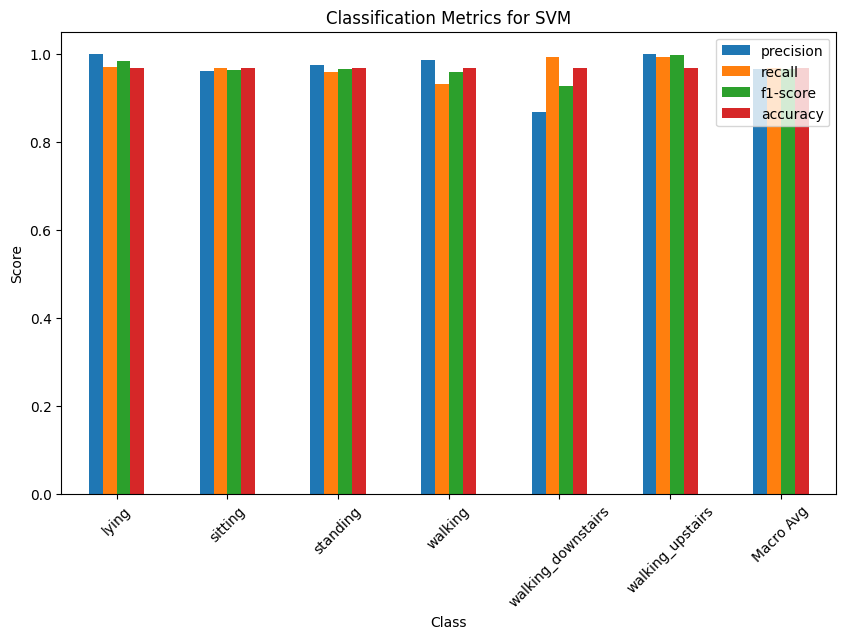

In [16]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['lying', 'sitting', 'standing', 'walking', 'walking_downstairs', 'walking_upstairs'],
                yticklabels=['lying', 'sitting', 'standing', 'walking', 'walking_downstairs', 'walking_upstairs'])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Function to plot classification report metrics (accuracy, precision, recall, F1-score)
def plot_classification_report(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, target_names=['lying', 'sitting', 'standing', 'walking', 'walking_downstairs', 'walking_upstairs'], output_dict=True)

    # Extract the metrics for each class and 'macro avg'
    metrics = ['precision', 'recall', 'f1-score']
    data = {
        metric: [report[class_label][metric] for class_label in ['lying', 'sitting', 'standing', 'walking', 'walking_downstairs', 'walking_upstairs']]
                + [report['macro avg'][metric]]
        for metric in metrics
    }
    data['accuracy'] = [accuracy_score(y_true, y_pred)] * (7)  # Accuracy for each class and 'macro avg'

    # Create a DataFrame to plot
    metrics_df = pd.DataFrame(data, index=['lying', 'sitting', 'standing', 'walking', 'walking_downstairs', 'walking_upstairs', 'Macro Avg'])

    # Plot the bar charts for the metrics
    metrics_df.plot(kind='bar', figsize=(10, 6))
    plt.title(f"Classification Metrics for {model_name}")
    plt.ylabel("Score")
    plt.xlabel("Class")
    plt.xticks(rotation=45)
    plt.show()

# Plot Confusion Matrix for both classifiers
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_svm, "SVM")

# Plot Classification Report Metrics for both classifiers
plot_classification_report(y_test, y_pred_rf, "Random Forest")
plot_classification_report(y_test, y_pred_svm, "SVM")